**Problem Statement:**

Many different industries need predictive maintenance solutions to reduce risks and gain actionable insights through processing data from their equipment.
Although system failure is a very general issue that can occur in any machine, predicting the failure and taking steps to prevent such failure is most important for any machine or software application.
Predictive maintenance evaluates the condition of equipment by performing online monitoring. The goal is to perform maintenance before the equipment degrades or breaks down.
This Capstone project is aimed at predicting the machine breakdown by identifying
the anomalies in the data.



The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. The rest of the columns are predictors.  


# Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    
   2.1  **[Understand the Data](#read)**
         
   2.1  **[Missing Value Treatment](#null)**
         
3. **[Exploratory Data Analysis](#eda)**
    
   3.1  **[PLOTTING SEASONAL DECOMPOSE](#lr)*
       
   3.2  **[FEATURE  SCALING ](#lr)*
       
4. **[TRAIN AND TEST SPLIT ](#lr)*  
    
5. **[TRAINING MODELS](#model)**
    
    5.1  **[NAIVE MODEL]**
    
    5.2  **[MOVING AVERAGE MODEL]**
    
    5.3  **[EXPONENTIAL SMOOTHING MODEL]**
    
    5.4  **[TRIPLE EXPONENTIAL SMOOTHING]**
    
    5.5  **[AUTOREGRESSION MODEL]**
    
    5.6  **[AUTOREGRESsive moving average MODEL]**
    
    5.7  **[AUTOGREGRESSIVE INTEGRATED MOVING AVERAGE]**
    
    5.8  **[SARIMA]**
    
    5.9  **[SARIMAX]**
    
    
6. **[MODEL VALIDATION ]**

# 1. IMPORTING LIBRARIES

In [1]:
#import data related libraries
import pandas as pd
import numpy as np

import datetime
import yfinance as yf

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
# import modelling libraries, and statistical libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA as ARIMA

# 2. DATA PREPARATION

In [2]:
df = pd.read_csv('AnomaData.csv')

## 2.1 UNDERSTAND THE DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [4]:
df.shape

(18398, 62)

## 2.2 MISSING VALUE TREATMENT

In [93]:
# lets firstly check for nulls
df.isna().sum()

y          0
x1         0
x2         0
x3         0
x4         0
x5         0
x6         0
x7         0
x8         0
x9         0
x10        0
y.1        0
anomaly    0
dtype: int64

**THERE ARE NO NULL VALUES**

In [5]:
# there are lots of columns , so to reduce the complexity of the analysis and model, we will be 
# dropping columns

In [6]:
df = df.drop(df.loc[:, 'x11':'x60'].columns, axis=1)

# 3. EXPLORATORY DATA ANALYSIS 

In [7]:
# lets describe the dataframe and its basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
y,18398.0,0.006740,0.081822,0.000000,0.000000,0.000000,0.000000,1.000000
x1,18398.0,0.011824,0.742875,-3.787279,-0.405681,0.128245,0.421222,3.054156
x2,18398.0,0.157986,4.939762,-17.316550,-2.158235,-0.075505,2.319297,16.742105
x3,18398.0,0.569300,5.937178,-18.198509,-3.537054,-0.190683,3.421223,15.900116
x4,18398.0,-9.958345,131.033712,-322.781610,-111.378372,-14.881585,92.199134,334.694098
x5,18398.0,0.006518,0.634054,-1.623988,-0.446787,-0.120745,0.325152,4.239385
x6,18398.0,2.387533,37.104012,-279.408440,-24.345268,10.528435,32.172974,96.060768
x7,18398.0,0.001647,0.108870,-0.429273,-0.058520,-0.009338,0.060515,1.705590
x8,18398.0,-0.004125,0.075460,-0.451141,-0.051043,-0.000993,0.038986,0.788826
x9,18398.0,-0.003056,0.156047,-0.120087,-0.059966,-0.030057,0.001990,4.060033


In [10]:
df['time'] = pd.to_datetime(df['time'],format='%m/%d/%y %H:%M')

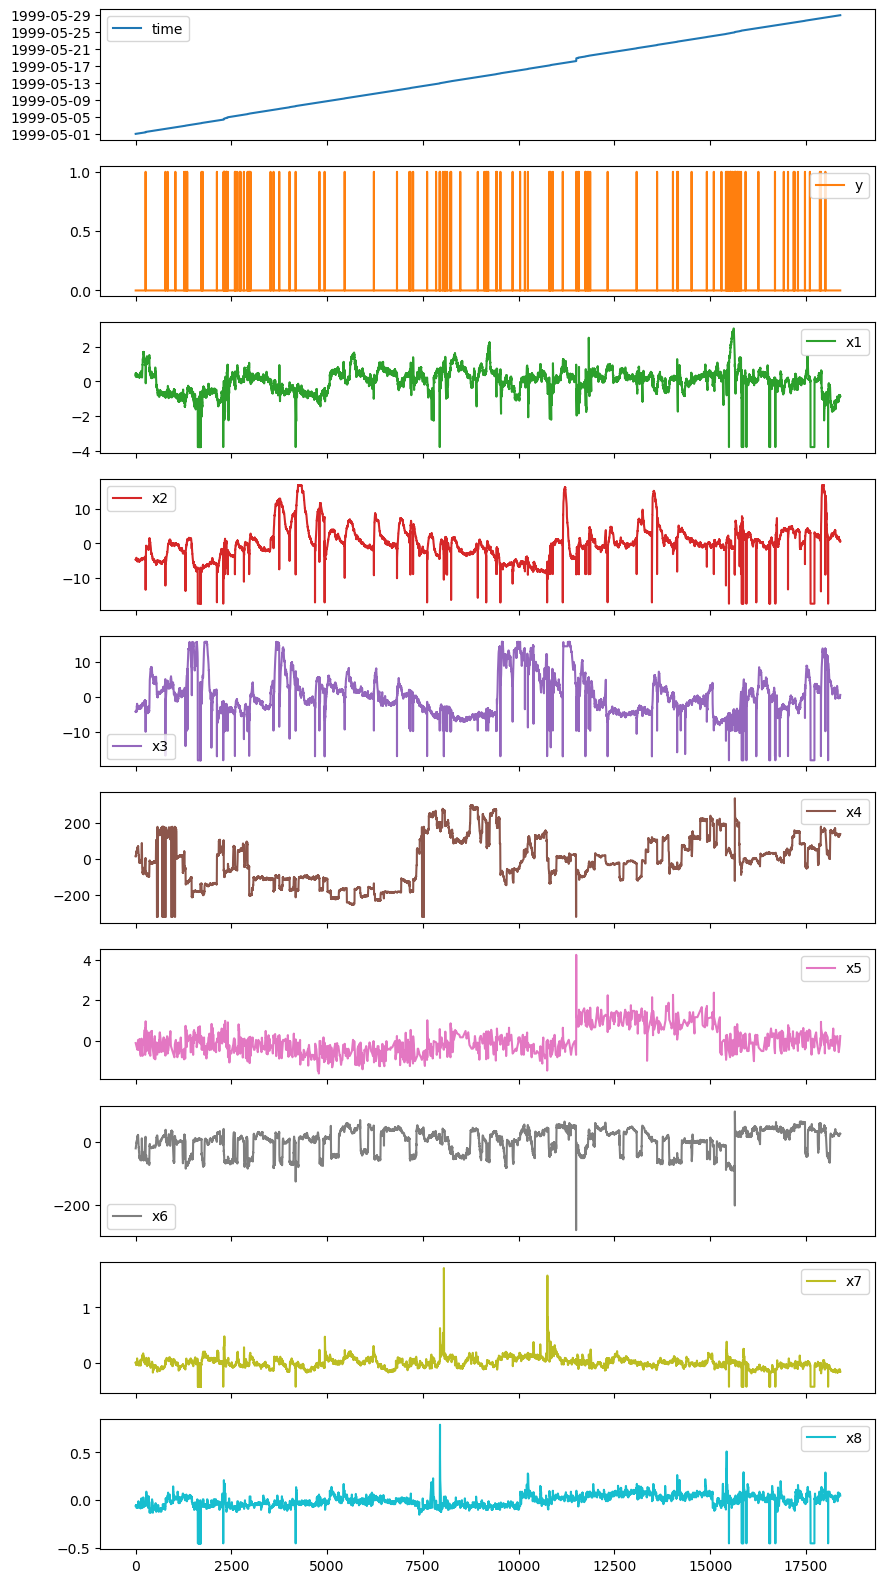

In [11]:
# Plot the first 10 columns as subplots --EDA
df.iloc[:, :10].plot(subplots=True, figsize=(10, 20))
plt.show()

**OBSERVATIONS**

1. We can see that in our predictors , there are sudden upward or downward movement , which could
be anomalies indicating  breakdown of machines 
2. In our 'y' variable which is our dependent variables , there is a normal continous movement for 
all the period
3. Variable 'y' indicates whther there is anomaly or not(1 as anomaly , 0 as non - anomaly)

### Analysing mean, median and mode graphically

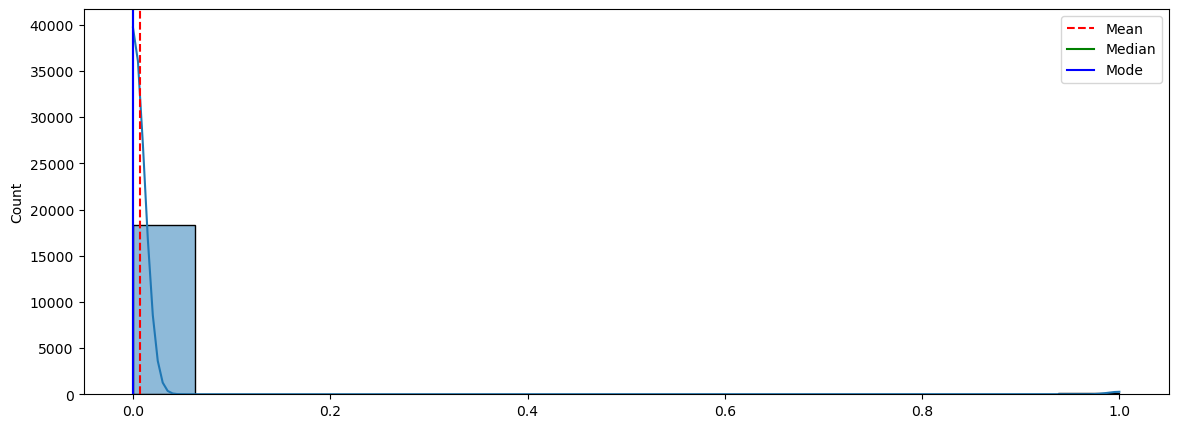

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))

# Distribution of target values
v_dist_1 = df['y'].values

# Histogram plot
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Find the mean, median, and mode
mean = df['y'].mean()
median = df['y'].median()
mode = df['y'].mode().values[0]

# Plot mean, median, and mode
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

# Add legend
ax1.legend()

plt.show()


# Analysing Time Series

Analysing a time series is a statistical process. Its a combination of visulalisation, 
decomposition and running statistical tests.
First lets understand thye components of a time series.

## Components of Time Series

A time series is composed of 3 components:

1. **Trend**: Its an increase or decrease in the data, measured over a long term. It could be linear, exponential and even can change direction over time.
2. **Seasonality**: A cycle repitition or pattern in the series with fixed frequencies. Frequency could be hour of the day, week, month etc.
3. **Noise**: Random variation in the series.

Time series can either be additive or multiplicative.
In case of additive time series, we can get the complete time series by adding these 3 components.

We can write the time series as 
Y[t] = T[t] + S[t] + e[t]

Multiplicative time series are slightly different, they are composed of multiplicative terms instead of additive. So the final equation becomes:
Y[t] = T[t] * S[t] * e[t]

How to know which time series is additive vs multiplicative?

The additive decomposition happens when the seasonal fluctuations do not vary with the level(mean) of the time-series. On the contrary, when the variation in the seasonal component appears to be proportional to the level(mean) of the time-series, then a multiplicative decomposition is more appropriate


### Decomposing a time series into its components.
To decompose a time series, we can use statsmodel package.
This package has a function called seasonal_decompose(). This package decomposes and plots the various components of time series.


### Parameters of the seasonal_decompose() function:
While there are a number of parameters for this function, the most crucial ones are below:
1. _Data_ column to be analysed, in our case, df['y'] or target.
2. _Period_, this is supposed to be the frequency at which the time series shows a pattern. This parameter is optional and ideally should be figured out automatically by the package. 
3. _model type_, this could be either additive or multiplicative, i am taking it as additive and 
i want to test how it works as additive model.

##  3.1 SEASONAL DECOMPOSE PLOTTING

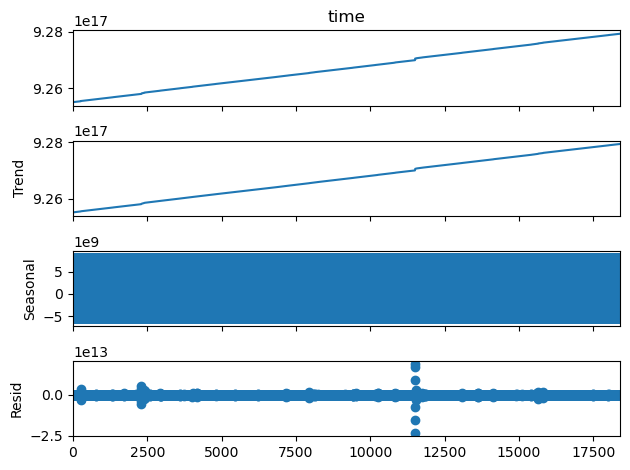

In [13]:
# plotting time column for seasonal decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['time'],model = 'additive',period = 7)
decomposition.plot()
plt.show()

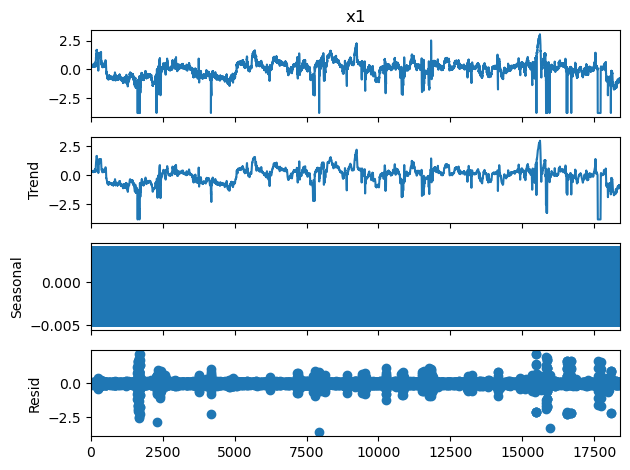

In [14]:
# plotting a random integer column for seasonal decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['x1'],model = 'additive',period = 7)
decomposition.plot()
plt.show()

**OBSERVATIONS**

1. THERE ARE OUTLIERS IN THE DATA
2. there is a clear trend in both time column and x1 column
3. IT is unclear about seasonality

In [15]:
# we can use statistical tests now , as we could not interpret whether our data was stationary or not 
# using plots .

# Stationarity of a Time Series

The most simplest definition of stationarity is that a time series' statistical properties or summary statistics do not change over time. Here statistical properties are mean, standard deviation etc. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

## Detecting Stationarity in Time Series

There are multiple ways of detecting stationarity in a time series but we will be discussing the common 2 ways:
1. **Plots** The most simplest and brute force way of detecting stationarity is by plotting the rolling summary statistics of a time series. A stationarity time series isnt supposed to have a changing mean or standard deviation. So if we see standard deviation or mean changing with the time. Its not a stationary time series.

2. **Statistical tests** Another way of looking for stationarity is the statistical tests. Various tests exist for checking the stationarity in a time series, we are going to be discussing the 2 most common ones. Augmented Dickey fuller (ADF) and KPSS tests.

### Plots
Plotting is simple, you just plot the rolling mean and standard deviation of the time series and see if they are constant or are they changing over time.

What is rolling mean and rolling standard deviation you ask? 
Rolling mean is simply the mean of last n values of time series. This n is set by the user. In our case we will be setting the n or the window as 5 since thats the period . You can choose a longer window as well.

Simularly rolling standard deviation is the standard deviation of last n values instead of the whole dataset.

These terms are called rolling because we are changing them as we move ahead in time.

### Stationarity Tests

#### Augmented Dickey Fuller Test (ADF):

The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series.

Unit root is a characteristic of a time series that makes it non-stationary.The presence of a unit root means the time series is non-stationary.

A Dickey-Fuller test is a unit root test that tests the null hypothesis that α=1 in the following model equation. α is the coefficient of the first lag on Y.
So the Null Hypothesis (HO):Series is not stationary and has a unit root
Alternate Hypothesis(HA): Series is stationary 

_Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary._




#### KPSS test
The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.

Null Hypothesis (HO): Series is trend stationary or series has no unit root.

Alternate Hypothesis(HA): Series is non-stationary or series has a unit root.

**Note: Hypothesis is reversed in KPSS test compared to ADF Test.**

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is trend stationary.

Conditions to Fail to Reject Null Hypothesis(HO)

If Test statistic < Critical Value and p-value < 0.05 – Fail to Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is trend stationary.

In [16]:
# we will bw using adf test

In [17]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=5).mean()
    MSTD = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

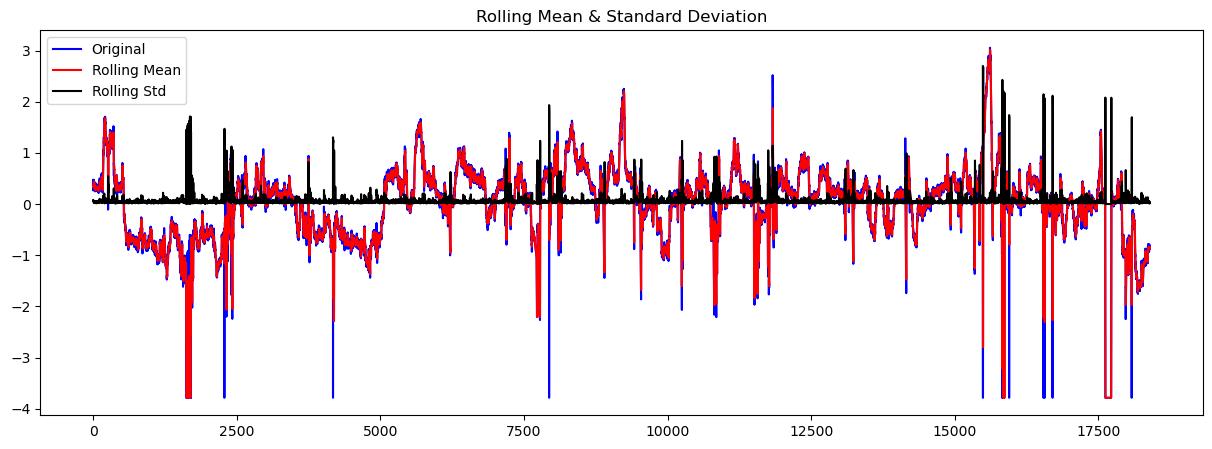

Results of Dickey-Fuller Test:
Test Statistic                -7.260718e+00
p-value                        1.684386e-10
#Lags Used                     4.200000e+01
Number of Observations Used    1.835500e+04
Critical Value (1%)           -3.430706e+00
Critical Value (5%)           -2.861697e+00
Critical Value (10%)          -2.566854e+00
dtype: float64


In [18]:
test_stationarity(df['x1'])

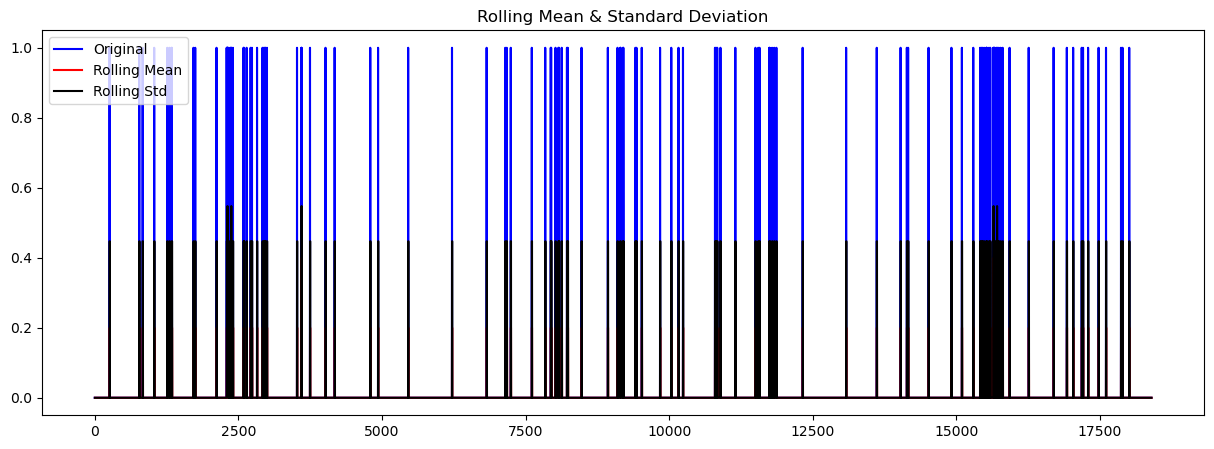

Results of Dickey-Fuller Test:
Test Statistic                -1.705497e+01
p-value                        8.020864e-30
#Lags Used                     4.200000e+01
Number of Observations Used    1.835500e+04
Critical Value (1%)           -3.430706e+00
Critical Value (5%)           -2.861697e+00
Critical Value (10%)          -2.566854e+00
dtype: float64


In [19]:
test_stationarity(df['y'])

In [20]:
# the data is stationary as the p-value is less than 0.05

## 3.2 Feature engineering - Feature scaling (there are no categorical columns , so no need to do encoding)

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df['y'].values.reshape(-1,1))
df_scaled = pd.DataFrame(df_scaled)

In [23]:
# NOW , WE WILL CHECK THE ANOMALIES THROUGH THE ISOLATIION FOREST THAT HELPS FIND OUT OUTLIERS.

In [24]:
outlier_fractions = 0.01 # setting a values ourselves for hypertuning
isolation_model = IsolationForest(contamination = outlier_fractions)
isolation_model.fit(df_scaled)
df['anomaly'] = isolation_model.predict(df_scaled)

In [25]:
df['anomaly'].value_counts()   # -1 represents the anomaly and 1 represents non- anomaly obs.

anomaly
 1    18274
-1      124
Name: count, dtype: int64

**THERE ARE 124 ROWS THAT REPRESENT ANOMALY THAT IS WHETHER THE MACHINE REQUIRES TO BE REPAIRED OR NOT**

 # 4. SPLITTING DATA INTO TRAIN AND TEST DATASET

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     18398 non-null  datetime64[ns]
 1   y        18398 non-null  int64         
 2   x1       18398 non-null  float64       
 3   x2       18398 non-null  float64       
 4   x3       18398 non-null  float64       
 5   x4       18398 non-null  float64       
 6   x5       18398 non-null  float64       
 7   x6       18398 non-null  float64       
 8   x7       18398 non-null  float64       
 9   x8       18398 non-null  float64       
 10  x9       18398 non-null  float64       
 11  x10      18398 non-null  float64       
 12  y.1      18398 non-null  int64         
 13  anomaly  18398 non-null  int32         
dtypes: datetime64[ns](1), float64(10), int32(1), int64(2)
memory usage: 1.9 MB


In [27]:
df.set_index('time', inplace = True)

In [28]:
# splitting data , this code will split rows count of data

train_len = int(len(df) * 0.8)
train = df[:train_len]
test = df[train_len:]

## 5.1 Naive Model

Naive model is simplest of all time series models. 
This approach to Time Series forecasting involves making assumptions such as predicting the value at a given time point 't' based on either the actual value of the variable at the previous time point 't-1' or the average value of the entire series.
Its usually created to create a baseline amongst the models.

In [29]:
# naive model considers a prediction by consideringg (t-1) only

In [30]:
predictions = pd.DataFrame()  # storing the predictions in a dataframe
predictions.index = test.index  # setting the same index of test as of  predictions
predictions['naive_model'] = train['y'].iloc[train_len-1]  # making TEST predictions for naive model

In [31]:
predictions['naive_model']

time
1999-05-23 13:58:00    0
1999-05-23 14:00:00    0
1999-05-23 14:02:00    0
1999-05-23 14:04:00    0
1999-05-23 14:06:00    0
                      ..
1999-05-28 23:58:00    0
1999-05-29 00:00:00    0
1999-05-29 00:02:00    0
1999-05-29 00:04:00    0
1999-05-29 00:06:00    0
Name: naive_model, Length: 3680, dtype: int64

In [32]:
predictions['naive_model_test'] = test.iloc[-1].values[0]

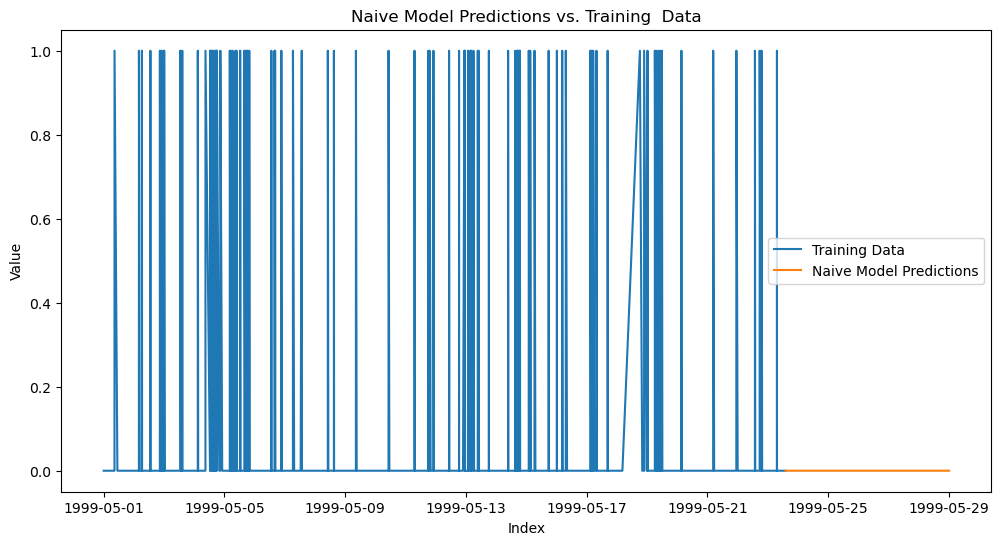

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the training data
plt.plot(train.index, train['y'], label='Training Data')

# Plot the predicted values
plt.plot(predictions.index, predictions['naive_model'], label='Naive Model Predictions')

# Add legend and title
plt.legend()
plt.title('Naive Model Predictions vs. Training  Data')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the plot
plt.show()


In [34]:
# aligning the train and predictions values
train = train[-len(predictions['naive_model']):]

In [35]:
# aligning the test and predictions values
test = test[-len(predictions['naive_model_test']):]

In [36]:
from sklearn.metrics import mean_absolute_error
mae_naive_train = mean_absolute_error(train['y'],predictions['naive_model'])  
print(f"Mean Absolute Error Train(MAE): {mae_naive_train}")


Mean Absolute Error Train(MAE): 0.004347826086956522


In [37]:
def Metrics_card(results, mae_train, method):
    new_results = pd.DataFrame({'Method': [method], 'MAE_train': [mae_train],})
    results = pd.concat([results, new_results], ignore_index=True)
    return results

In [38]:
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Method', 'MAE_train'])

# Add results for another model
results = Metrics_card(results, mae_naive_train, method='NAIVE Model')

print(results)

        Method  MAE_train
0  NAIVE Model   0.004348


C:\Users\Sahil\AppData\Local\Temp\ipykernel_15692\1300823875.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_results], ignore_index=True)


## 5.2 MOVING AVERAGE

The simple moving average is the unweighted mean of the previous M data points. The selection of M (sliding window) depends on the amount of smoothing desired since increasing the value of M improves the smoothing at the expense of accuracy.

The window is what we need to choose for the forecast.

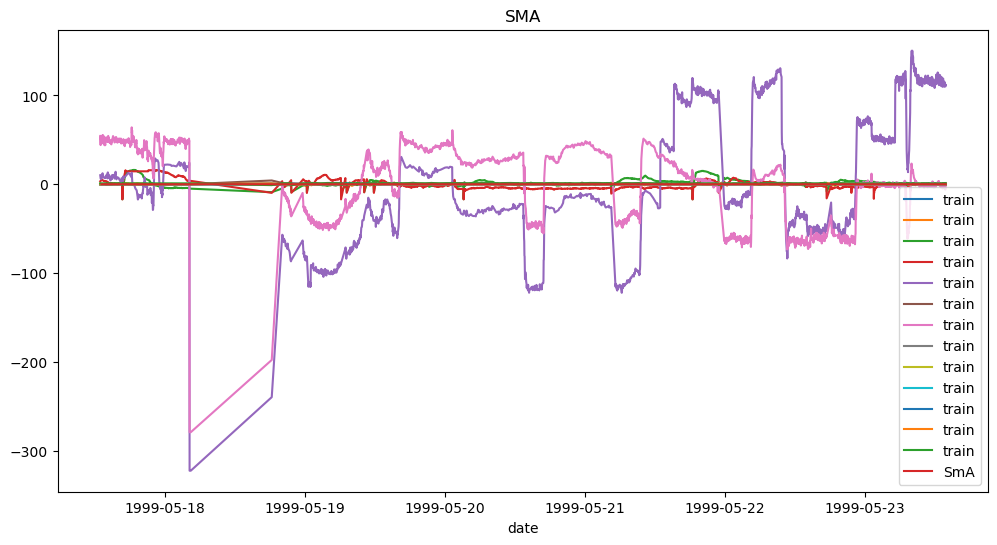

In [39]:
ma = train['y'].rolling(8).mean()

plt.figure(figsize=(12, 6))

plt.plot(train.index, train, label = 'train')

plt.plot(ma.index, ma, label = 'SmA')

plt.title('SMA')
plt.xlabel('date')
plt.legend()
plt.show()

In [40]:
ma

time
1999-05-17 12:50:00    NaN
1999-05-17 12:52:00    NaN
1999-05-17 12:54:00    NaN
1999-05-17 12:56:00    NaN
1999-05-17 12:58:00    NaN
                      ... 
1999-05-23 13:48:00    0.0
1999-05-23 13:50:00    0.0
1999-05-23 13:52:00    0.0
1999-05-23 13:54:00    0.0
1999-05-23 13:56:00    0.0
Name: y, Length: 3680, dtype: float64

In [41]:
# dropping nan values as fitting moving average generates some nan values always
ma = ma.dropna()
# calculating mean absolute error
mae_ma_train = mean_absolute_error(train['y'].iloc[7:],ma)

In [42]:
mae_ma_train

0.007623196297304655

In [43]:
def plotResults(data,forecast,label):
#     plot model's forecast vs actual values
    plt.figure(figsize=(20,5))
    plt.plot(data, label='Train')
    naive=plt.plot(forecast, label=label)
    plt.legend(loc='best')
    plt.title(label+" forecast")
    return plt

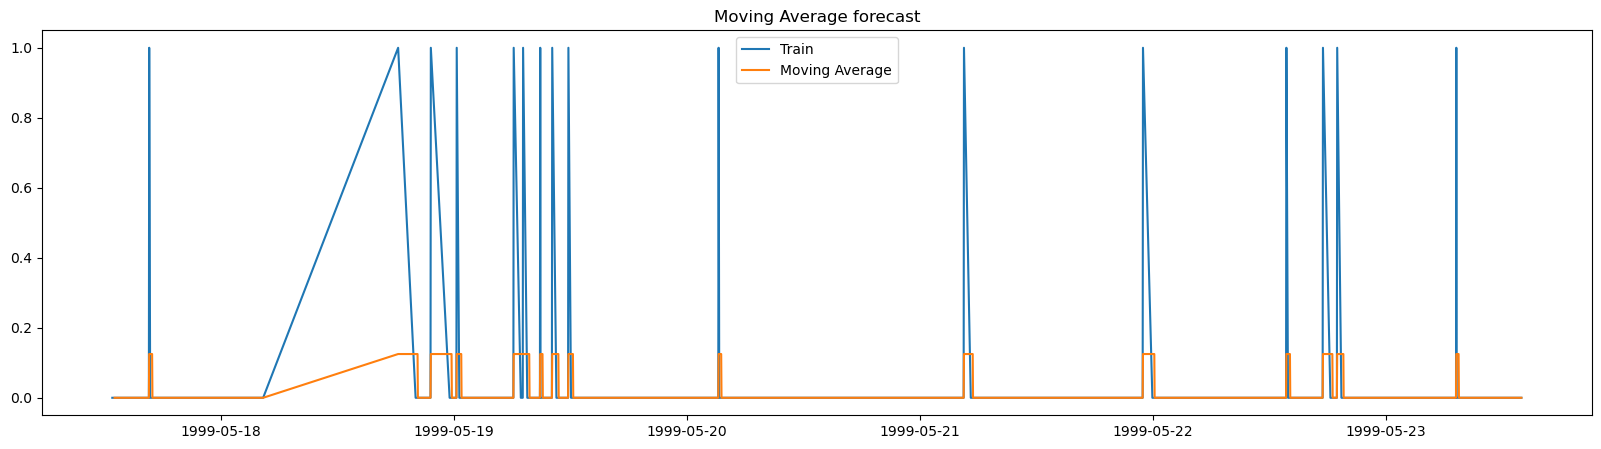

In [44]:
label="Moving Average"
plotResults(train['y'],ma, label).show()

In [45]:
print(f"Mean Absolute Error MA TRAIN (MAE): {mae_ma_train}")

Mean Absolute Error MA TRAIN (MAE): 0.007623196297304655


In [46]:
# Add results for the moving average model
results = Metrics_card(results, mae_ma_train, method='Moving Average')

In [47]:
print(results)

           Method  MAE_train
0     NAIVE Model   0.004348
1  Moving Average   0.007623


## 5.3 SINGLE EXPONENTIAL SMOOTHING

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

In [48]:
# Lets import the libraries for Exponential smoothening

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


We can either choose the alpha parameter ourselves or let the statsmodel package estimate the best one for us, we will look at all the cases below

In [49]:
# NOW WE WILL KEEP DIFFERNET VALUES OF SMOOTHING THREE TIMES AND SEE WHICH MODEL PERFORMS THE BEST
# ON WHICH VALUE AND WE WILL KEEP THE VALUE.

In [50]:

# lets define simple exponential smoothening with different values of smoothing level alpha 
fit1 = SimpleExpSmoothing(train['y'], initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(train['y'], initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(train['y'], initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])


C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

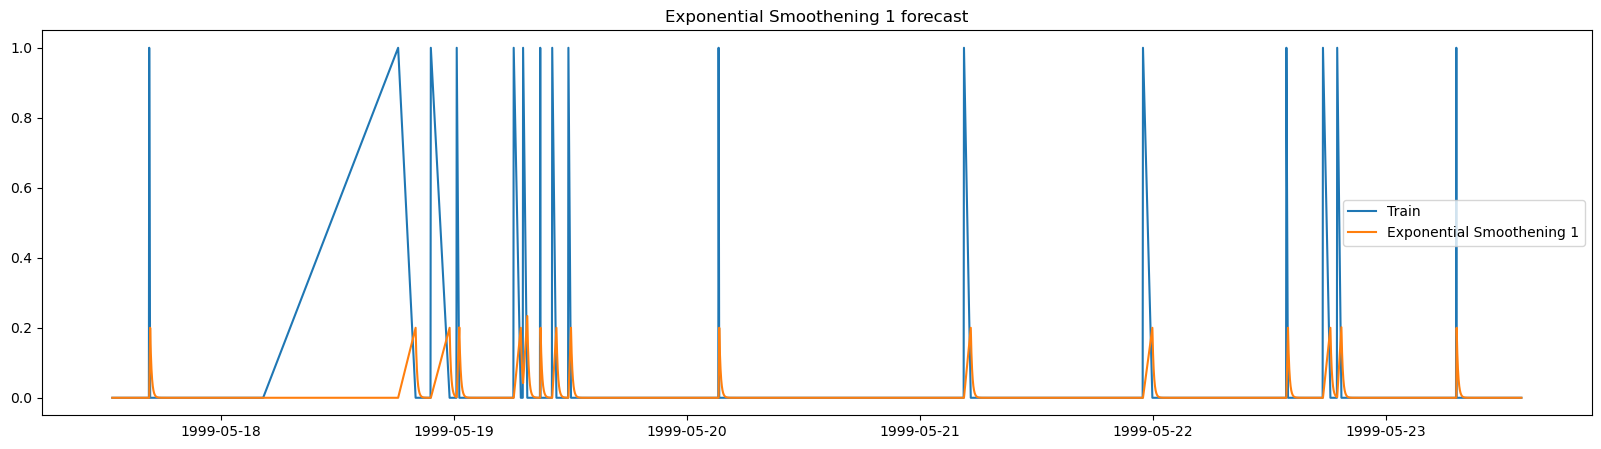

In [51]:
plotResults(train['y'],fit1.fittedvalues, "Exponential Smoothening 1").show()

In [52]:
mae_ES1 = mean_absolute_error(train['y'],fit1.fittedvalues)  
print(f"Mean Absolute Error (MAE): {mae_ES1}")

Mean Absolute Error (MAE): 0.008670969046214061


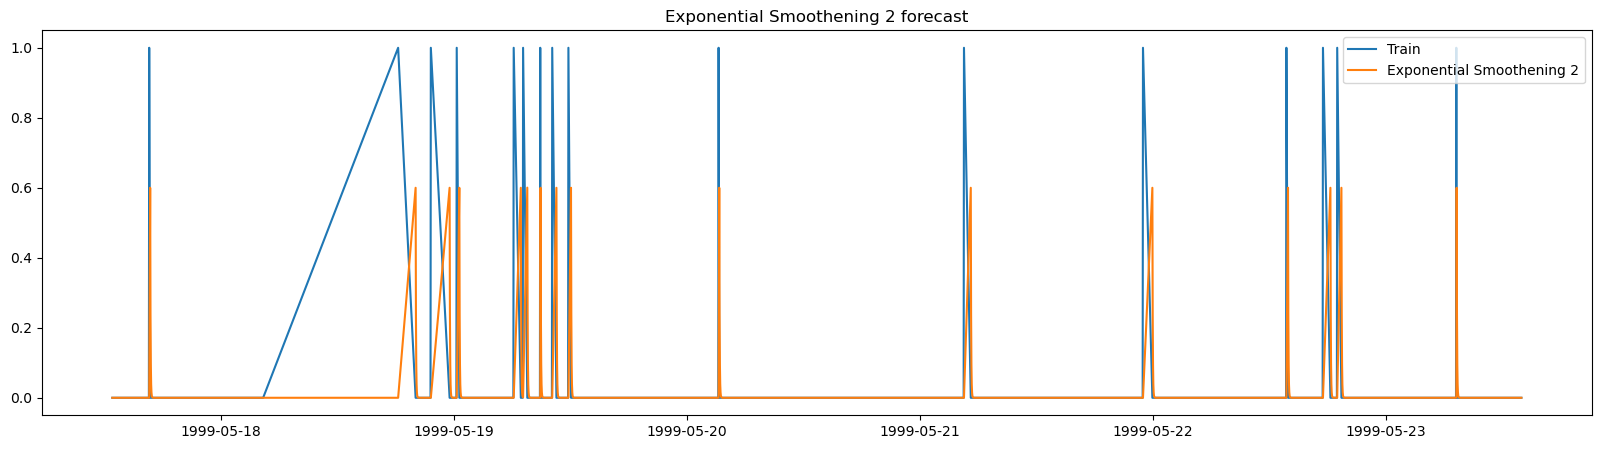

In [53]:
plotResults(train['y'],fit2.fittedvalues, "Exponential Smoothening 2").show()

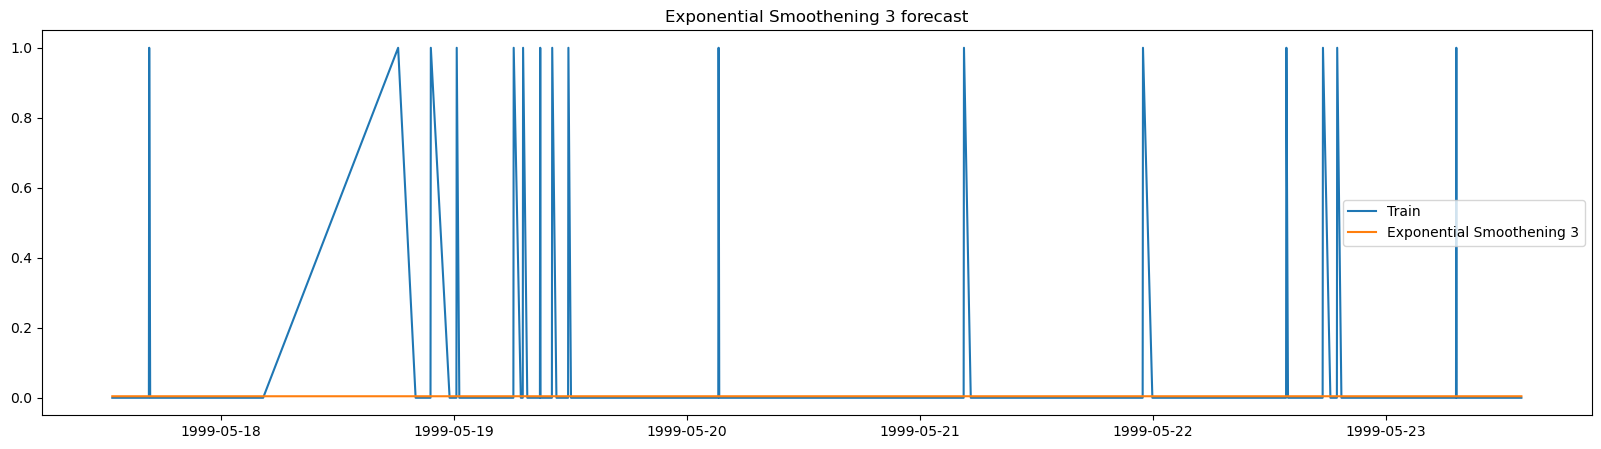

In [54]:
plotResults(train['y'],fit3.fittedvalues, "Exponential Smoothening 3").show()

In [55]:
mae_ES3_train = mean_absolute_error(train['y'],fit3.fittedvalues)  
print(f"Mean Absolute Error (MAE): {mae_ES3_train}")

Mean Absolute Error (MAE): 0.008657859280503827


In [56]:
# Add results for the exponential smoothing model
results = Metrics_card(results, mae_ES3_train, method='EXPONENTIAL SMOOTHING')

In [57]:
print(results)

                  Method  MAE_train
0            NAIVE Model   0.004348
1         Moving Average   0.007623
2  EXPONENTIAL SMOOTHING   0.008658


## 5.4 Triple exponential smoothing a.k.a. Holt-Winters¶

Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.


In [58]:
# Define triple exponential smoothening
tripleExp_train= ExponentialSmoothing(train['y'], trend='add', seasonal='add', seasonal_periods=10).fit()

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


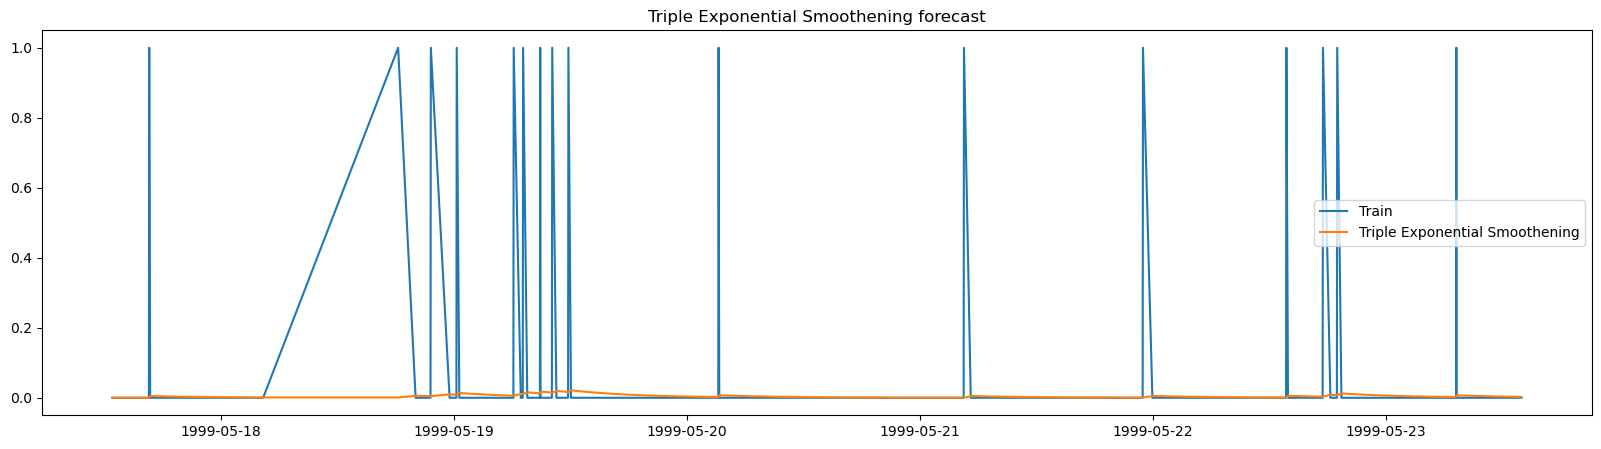

In [59]:
# plot and get metrics for train model
plotResults(train['y'],tripleExp_train.fittedvalues, "Triple Exponential Smoothening").show()


In [60]:
# Extracting MAE values from tripleExp_train and tripleExp_test
mae_tripleExp_train = tripleExp_train.sse / len(tripleExp_train.fittedvalues)

# Add results for the triple exponential smoothing model
results = Metrics_card(results, mae_tripleExp_train, method='TRIPLE EXPONENTIAL SMOOTHING')

print(results)


                         Method  MAE_train
0                   NAIVE Model   0.004348
1                Moving Average   0.007623
2         EXPONENTIAL SMOOTHING   0.008658
3  TRIPLE EXPONENTIAL SMOOTHING   0.004335


## 5.5 AR (Autoregression)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


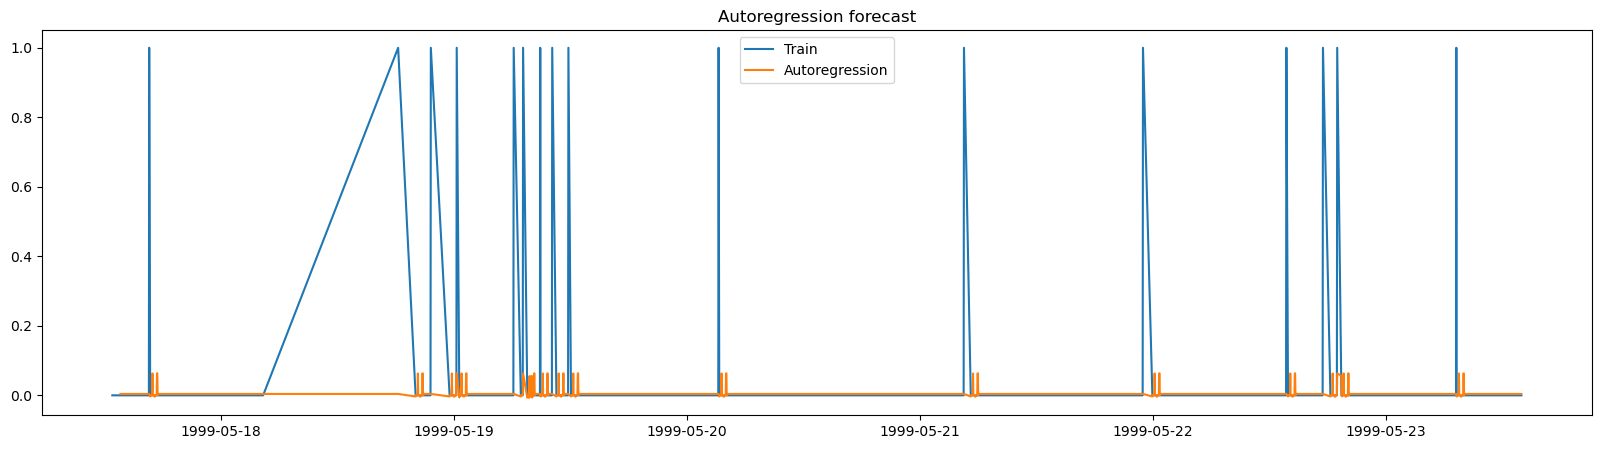

In [61]:
from statsmodels.tsa.ar_model import AutoReg
# fit model for traindata
arModel = AutoReg(train['y'], lags=25)
res = arModel.fit()
# make prediction for trained model
plotResults(train['y'],res.fittedvalues, "Autoregression").show()


In [62]:
# fitting ar model for test data
arModel_test = AutoReg(test['y'], lags=25)
res_test = arModel_test.fit()

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
res.summary() # summary function shows all the stats for the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3680
Model:                    AutoReg(25)   Log Likelihood                4767.210
Method:               Conditional MLE   S.D. of innovations              0.066
Date:                Thu, 29 Feb 2024   AIC                          -9480.420
Time:                        13:05:23   BIC                          -9312.916
Sample:                            25   HQIC                         -9420.771
                                 3680                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.001      3.507      0.000       0.002       0.006
y.L1          -0.0073      0.017     -0.444      0.657      -0.040       0.025
y.L2          -0.0034      0.017     -0.206      0.837      -0.036       0.029
y.L3          -0.0036      0.017     -0.217      0.828      -0.036       0.029
y.L4          -0.0038      0.016     -0.230      0.818      -0.036       0.029
y.L5          -0.0038      0.016     -0.230      0.818      -0.036       0.029
y.L6          -0.0035      0.016     -0.215      0.830      -0.036       0.029
y.L7          -0.0035      0.016     -0.215      0.830      -0.036       0.029
y.L8           0.0590      0.016      3.577      0.000       0.027       0.091
y.L9          -0.0033      0.017     -0.202      0.840      -0.036       0.029
y.L10         -0.0036      0.017     -0.216      0.829      -0.036       0.029
y.L11         -0.0036      0.017     -0.215      0.830      -0.036       0.029
y.L12         -0.0035      0.017     -0.214      0.830      -0.036       0.029
y.L13         -0.0035      0.017     -0.214      0.830      -0.036       0.029
y.L14         -0.0075      0.017     -0.453      0.651      -0.040       0.025
y.L15         -0.0075      0.017     -0.455      0.649      -0.040       0.025
y.L16         -0.0075      0.017     -0.455      0.649      -0.040       0.025
y.L17         -0.0036      0.017     -0.218      0.828      -0.036       0.029
y.L18         -0.0038      0.016     -0.230      0.818      -0.036       0.029
y.L19         -0.0038      0.016     -0.230      0.818      -0.036       0.029
y.L20         -0.0038      0.016     -0.230      0.818      -0.036       0.029
y.L21         -0.0038      0.016     -0.230      0.818      -0.036       0.029
y.L22          0.0590      0.016      3.577      0.000       0.027       0.091
y.L23          0.0594      0.017      3.598      0.000       0.027       0.092
y.L24         -0.0029      0.017     -0.174      0.862      -0.035       0.030
y.L25         -0.0034      0.017     -0.203      0.839      -0.036       0.029
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1124           -0.0000j            1.1124           -0.0000
AR.2             1.0657           -0.2946j            1.1057           -0.0429
AR.3             1.0657           +0.2946j            1.1057            0.0429
AR.4             0.9303           -0.5911j            1.1022           -0.0901
AR.5             0.9303           +0.5911j            1.1022            0.0901
AR.6             0.7360           -0.8146j            1.0978           -0.1331
AR.7             0.7360           +0.8146j            1.0978            0.1331
AR.8             0.4902           -0.9951j            1.1093           -0.1771
AR

In [64]:
aligned_train_y = train['y'].loc[res.fittedvalues.index] # aligned index
mae_AR_train = mean_absolute_error(aligned_train_y, res.fittedvalues)# calculating mae
print(f"Mean Absolute Error AR (MAE): {mae_AR_train}")

Mean Absolute Error AR (MAE): 0.008766732597459278


In [65]:
# Add results for the triple exponential smoothing model
results = Metrics_card(results, mae_AR_train, method='AUTOREGRESSION MODEL')

print(results)

                         Method  MAE_train
0                   NAIVE Model   0.004348
1                Moving Average   0.007623
2         EXPONENTIAL SMOOTHING   0.008658
3  TRIPLE EXPONENTIAL SMOOTHING   0.004335
4          AUTOREGRESSION MODEL   0.008767


## 5.6 Autoregressive Moving Average  (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


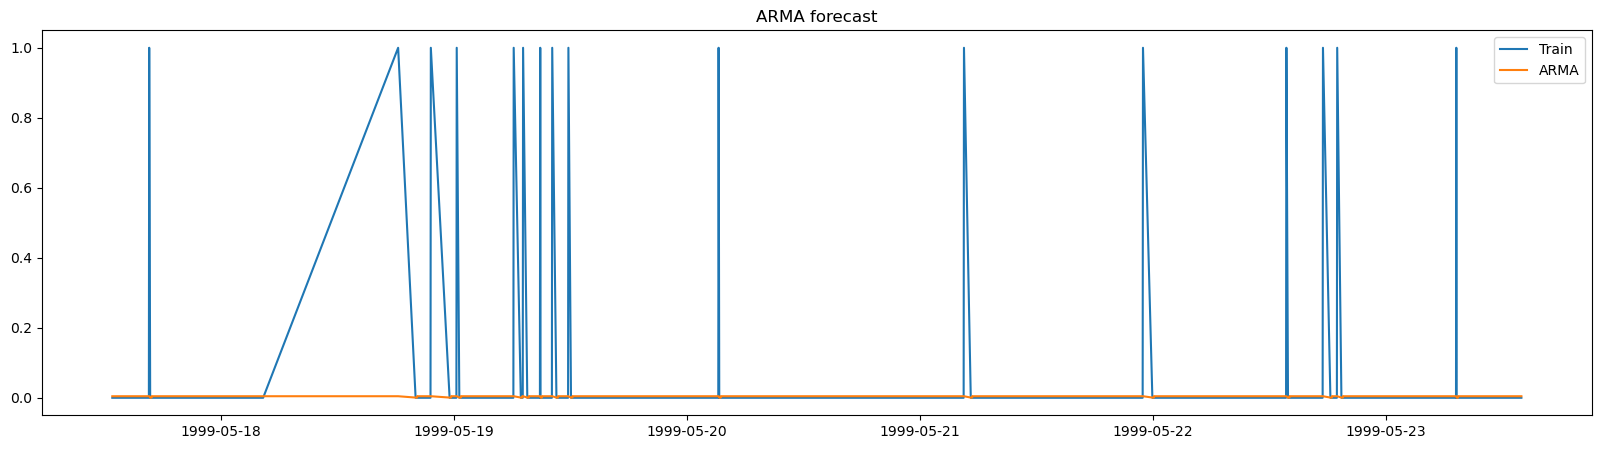

In [66]:
# fit model
train_model = ARIMA(train['y'], order=(1, 0, 5))
arma_train = train_model.fit()


# make prediction, plot and get metrics
plotResults(train['y'],arma_train.fittedvalues, "ARMA").show()


In [67]:
# fitting model for test data
# fit model
test_model = ARIMA(test['y'], order=(1, 0, 5))
arma_test = test_model.fit()

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
aligned_train_y = train['y'].loc[arma_train.fittedvalues.index]
mae_AMA_train = mean_absolute_error(aligned_train_y, arma_train.fittedvalues)
print(f"Mean Absolute Error AR (MAE): {mae_AMA_train}")


Mean Absolute Error AR (MAE): 0.008650124286197982


In [69]:
# Add results for the triple exponential smoothing model
results = Metrics_card(results, mae_AMA_train, method='AUTOREGRESsive moving average MODEL')

print(results)

                                Method  MAE_train
0                          NAIVE Model   0.004348
1                       Moving Average   0.007623
2                EXPONENTIAL SMOOTHING   0.008658
3         TRIPLE EXPONENTIAL SMOOTHING   0.004335
4                 AUTOREGRESSION MODEL   0.008767
5  AUTOREGRESsive moving average MODEL   0.008650


## ACF and PCF

These are not another time series models but are rather plots to check for some crucial values for ARIMA family of models which are going to be studying in the section following this section.





#### ACF
Autocorrelation is the correlation between a time series with a lagged version of itself. The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

For example, If it is raining now, the autocorrelation implies that it will also rain tomorrow than if it is rainy today. When it comes to investment, a stock’s positive autocorrelation of returns may be strong, which implies that if it’s up today, it’s more likely to be up tomorrow.
The autocorrelation function (ACF) evaluates the correlation between observations in a time series over a given range of lags.
The ACF can be used to determine a time series’ randomness and stationarity.

### PCF
Partial autocorrelation is similar to ACF and even uses the same autocorrelation formula but the major differnence is that the effect of all the other lags that come in between is minimised. 

So for example if you are intersted in knowing the correlation between today's stock value and the value from 12 days ago. PCF will simply calculate that for you without taking in consideration the value of stocks in between while calculating this correlation.

For example, if we’re regressing a signal S at lag t $ (S_{t}) $ with the same signal at lags t-1, t-2 and t-3 $ (S_{t-1} $, $ S_{t-2} $, $ S_{t-3}) $, the partial correlation between $ S_{t} $ and $ S_{t-3} $ is the amount of correlation between $ S_{t} $ and $ S_{t-3} $ that isn’t explained by their mutual correlations with $ S_{t-1} $ and $ S_{t-2} $.

#### Plotting ACF and PCF

Plotting ACF and PCF is simple using python using the smt or statsmodel package, just pass the time series to these functions and it will plot them for you.

These plots are called lollipop plots in layman language because the lines indeed look like lollypops. They also have a blue area in those plots shaded, anything in that blue area is statistically insignificant. 
Outside blue area are the lines that are statistically significant and are the ones we should be looking for

In [70]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
#     Check if the series is a pandas series or not because our plots assume them to be time series
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
#         use smt's plotting powers to plot PCF and ACF
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

## 5.7 ARIMA (Autoregressive Integrated Moving Average)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.

1. p is the number of autoregressive terms,
2. d is the number of nonseasonal differences needed for stationarity, and
3. q is the number of lagged forecast errors in the prediction equation.


**You don't need a stationary time series for ARIMA because the I in ARIMA or the integration does the differencing for you to make the time series stationary.
This is however not true for ARMA or AR models, they require stationery time series because they don't do the integration of differencing**

#### Finding p and q in ARIMA

The best way to find these p q is using the PACF and ACF plots of the time series. Since we are not using the differenced time series for this model. We will simply plot the PACF and ACF for our raw time series.

1. The significant peaks of the PACF plot is the value of p.
2. The significant peaks of the ACP plot is the value of q.

Lets use our tsplot function!

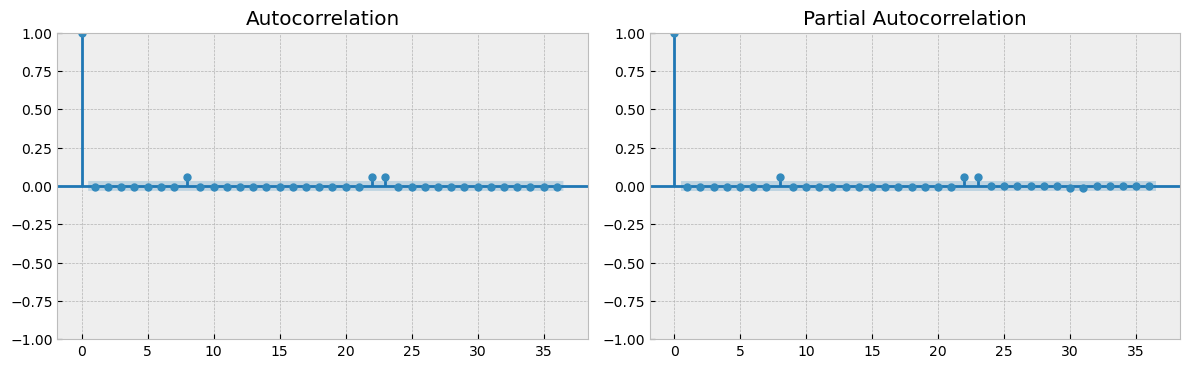

In [71]:
tsplot(train['y'])

Its apparent from the plots above that both PACF and ACF are taking significant values at 1.
We will be using p and q as 1 in our ARIMA model.

#### Finding d in ARIMA
There is no direct way of finding d, we just need to difference the time series till it becomes stationery.
In our case d=1 worked because we already created data_diff above and proved it to be stationry using ADF test as well.

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


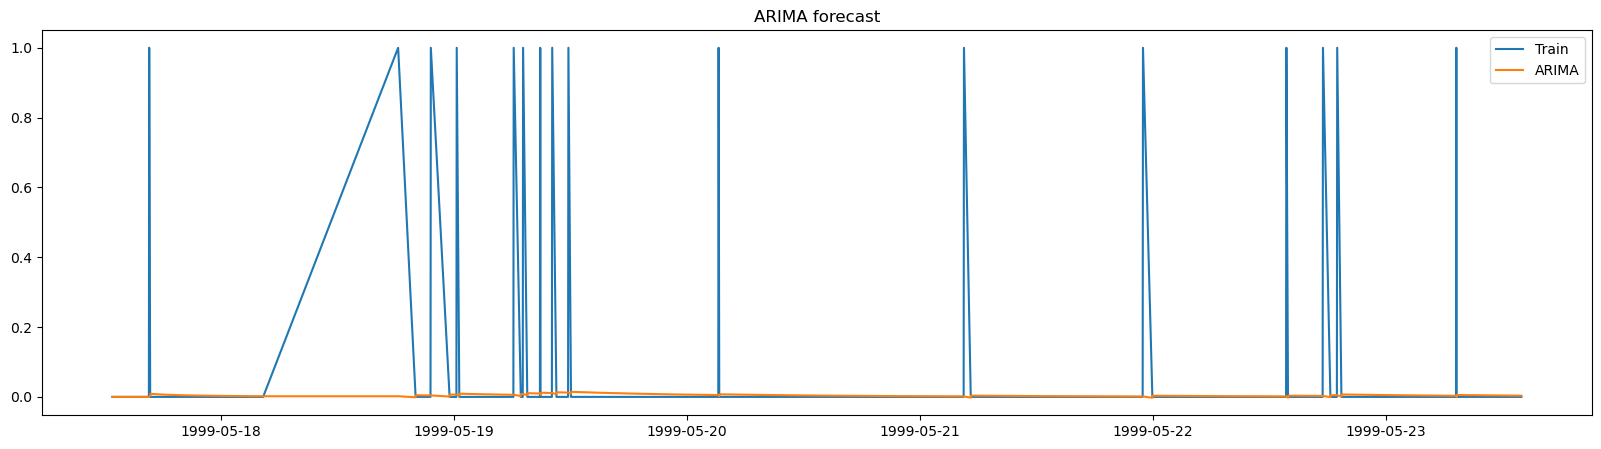

In [72]:
# fit model
# order parameter is where we define p, d and q values.
train_model = ARIMA(train['y'], order=(1, 1, 1))
train_arima = train_model.fit()


# make prediction and plots
plotResults(train['y'],train_arima.fittedvalues, "ARIMA").show()

In [73]:
test_model = ARIMA(test['y'], order=(1, 1, 1))
test_arima = test_model.fit()


C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
aligned_train_y = train['y'].loc[train_arima.fittedvalues.index]
mae_ARIMA_train = mean_absolute_error(aligned_train_y, train_arima.fittedvalues)
print(f"Mean Absolute Error AR (MAE): {mae_ARIMA_train}")


Mean Absolute Error AR (MAE): 0.008735485872691306


In [75]:
# Add results for the triple exponential smoothing model
results = Metrics_card(results, mae_ARIMA_train, method='AUTOGREGRESSIVE INTEGRATED MOVING AVERAGE')

print(results)

                                      Method  MAE_train
0                                NAIVE Model   0.004348
1                             Moving Average   0.007623
2                      EXPONENTIAL SMOOTHING   0.008658
3               TRIPLE EXPONENTIAL SMOOTHING   0.004335
4                       AUTOREGRESSION MODEL   0.008767
5        AUTOREGRESsive moving average MODEL   0.008650
6  AUTOGREGRESSIVE INTEGRATED MOVING AVERAGE   0.008735


## 5.8 SARIMA

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

_The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name means that the implementation also supports exogenous variables._

These are parallel time series variates that are not modeled directly via AR, I, or MA processes, but are made available as a weighted input to the model.

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


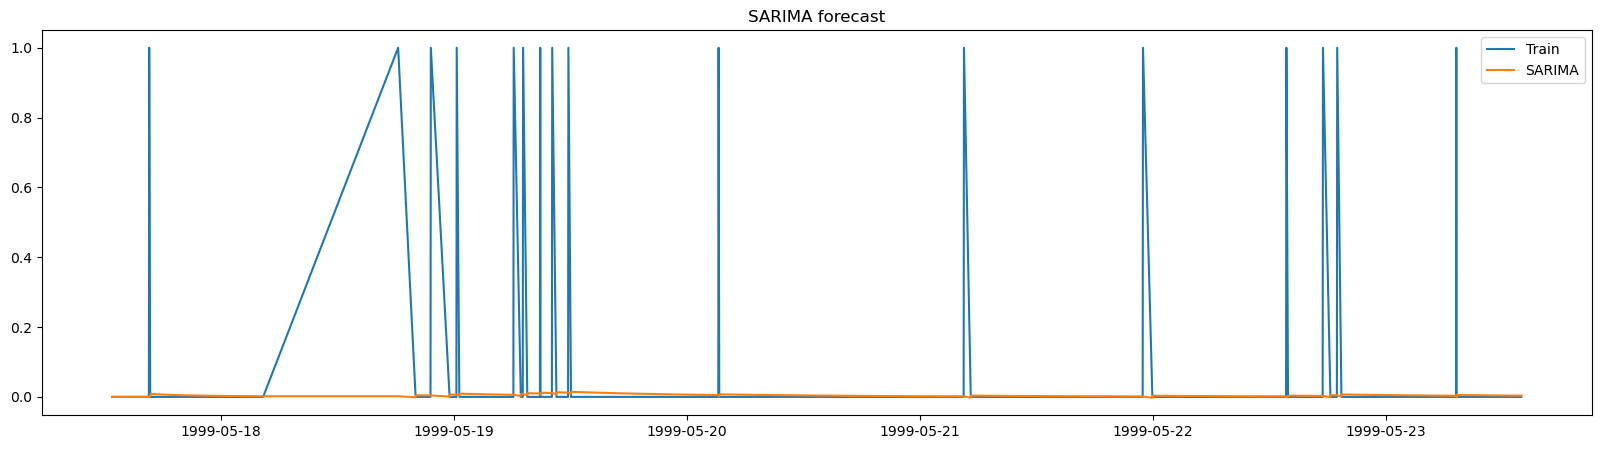

In [76]:
# import SARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
train_model = SARIMAX(train['y'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
train_sariMa = train_model.fit(disp=False)
# make prediction
plotResults(train['y'],train_sariMa.fittedvalues, "SARIMA").show()


In [77]:
test_model = SARIMAX(test['y'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
test_sariMa = test_model.fit(disp=False)

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [78]:
mae_sARima_train = mean_absolute_error(aligned_train_y, train_sariMa.fittedvalues)
print(f"Mean Absolute Error sARima  train (MAE): {mae_sARima_train}")

Mean Absolute Error sARima  train (MAE): 0.008735485872691306


In [79]:
# Add results for the triple exponential smoothing model
results = Metrics_card(results, mae_sARima_train, method='SARIMA')

print(results)

                                      Method  MAE_train
0                                NAIVE Model   0.004348
1                             Moving Average   0.007623
2                      EXPONENTIAL SMOOTHING   0.008658
3               TRIPLE EXPONENTIAL SMOOTHING   0.004335
4                       AUTOREGRESSION MODEL   0.008767
5        AUTOREGRESsive moving average MODEL   0.008650
6  AUTOGREGRESSIVE INTEGRATED MOVING AVERAGE   0.008735
7                                     SARIMA   0.008735


## 5.9 SARIMAX

SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model. Therefore, we can say SARIMAX is a seasonal equivalent model like SARIMA and Auto ARIMA.


Exogeneuous factors are the time series which may affect the current time series predictions.

Lets use y.1 as the exog in the SARIMAX

In the SARIMAX models parameter, we need to provide two kinds of orders. The first one is similar to the ARIMAX model (p, d, q), and the other is to specify the effect of the seasonality; we call this order a seasonal order in which we are required to provide four numbers. 

(Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity)In the SARIMAX models parameter, we need to provide two kinds of orders. The first one is similar to the ARIMAX model (p, d, q), and the other is to specify the effect of the seasonality; we call this order a seasonal order in which we are required to provide four numbers. 

(Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity)

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


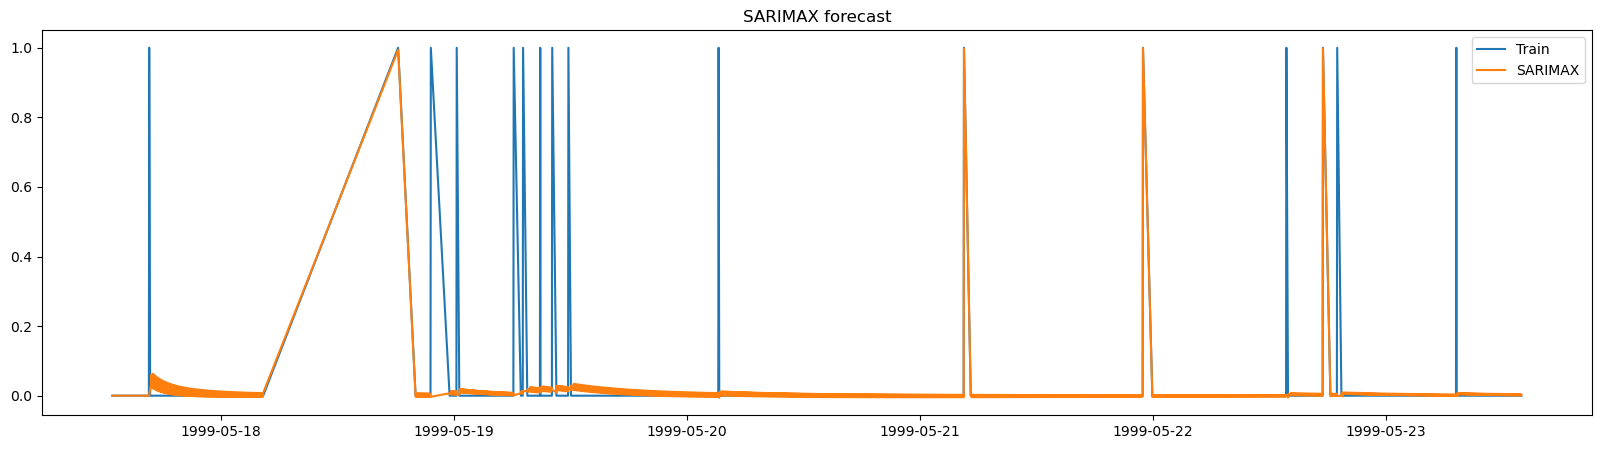

In [80]:
model=sm.tsa.statespace.SARIMAX(train['y'], order=(1, 1, 1),seasonal_order=(1,1,1,5), exog=train['y.1'])
sariMax=model.fit(disp=False)

# make prediction
plotResults(train['y'],sariMax.fittedvalues[1:], "SARIMAX").show()

In [81]:
mae_sARimax_train = mean_absolute_error(aligned_train_y, sariMax.fittedvalues)
print(f"Mean Absolute Error AR (MAE): {mae_AR_train}")


Mean Absolute Error AR (MAE): 0.008766732597459278


In [82]:
# Add results for the triple exponential smoothing model
results = Metrics_card(results, mae_sARimax_train, method='SARIMAX')

print(results)

                                      Method  MAE_train
0                                NAIVE Model   0.004348
1                             Moving Average   0.007623
2                      EXPONENTIAL SMOOTHING   0.008658
3               TRIPLE EXPONENTIAL SMOOTHING   0.004335
4                       AUTOREGRESSION MODEL   0.008767
5        AUTOREGRESsive moving average MODEL   0.008650
6  AUTOGREGRESSIVE INTEGRATED MOVING AVERAGE   0.008735
7                                     SARIMA   0.008735
8                                    SARIMAX   0.008359


**THE BEST MODEL COMES OUT TO BE NAIVE MODEL AND TRIPLE EXPONENTIAL SMOOTHING WITH THE LEAST ERROR**

## 6. MODEL VALIDATION

**As the best model comes to be naive and triple exponential smoothing , we will apply them on test data. Also, most model perform the same on trainng data , so we will perform predictions on only two of them that is sarimax and moving average** 

In [113]:
# making predictions on moving average
# Use the last value of the rolling mean as the prediction for each point in the test data
predictions_ma = [ma.iloc[-1]] * len(test)

In [84]:
#MAKING TEST PREDICITONS FOR TRIPLE EXPONENTIAL SMOOTHING
tripleExp_predictions = tripleExp_train.forecast(len(test))

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [116]:
from sklearn.metrics import mean_absolute_error

# calculating mae for triple exponential on test data
mae_ma_test = mean_absolute_error(test['y'],predictions_ma )

print("Mean Absolute Error (MAE):", mae_ma_test)

Mean Absolute Error (MAE): 0.00923913043478261


In [104]:
from sklearn.metrics import mean_absolute_error

# calculating mae for triple exponential on test data
mae_tripleexp_test = mean_absolute_error(test['y'],tripleExp_predictions )

print("Mean Absolute Error (MAE):", mae_tripleexp_test)


Mean Absolute Error (MAE): 0.011919896498270487


In [107]:

# calculating mae for sarimax on test data
mae_sarimax_test = mean_absolute_error(test['y'],predictions_sarima )

print("Mean Absolute Error (MAE):", mae_sarimax_test)


Mean Absolute Error (MAE): 0.012607931508865772


In [106]:
# calculating mae for naive model on test data
mae_naive_test = mean_absolute_error(test['y'],predictions['naive_model'] )

print("Mean Absolute Error (MAE):", mae_naive_test)

Mean Absolute Error (MAE): 0.00923913043478261


**FOR BETTER MODEL VALIDATION , AND CONFIRMING THAT NAIVE AND TRIPLE WORKS BEST THAN OTHER MODELS,
WE WILL APPLY PREDICTION ON SARIMAX ALSO AND COMPARE THEM WITH THE PREDICTIONS OF NAIVE AND TRIPLE**

C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Sahil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

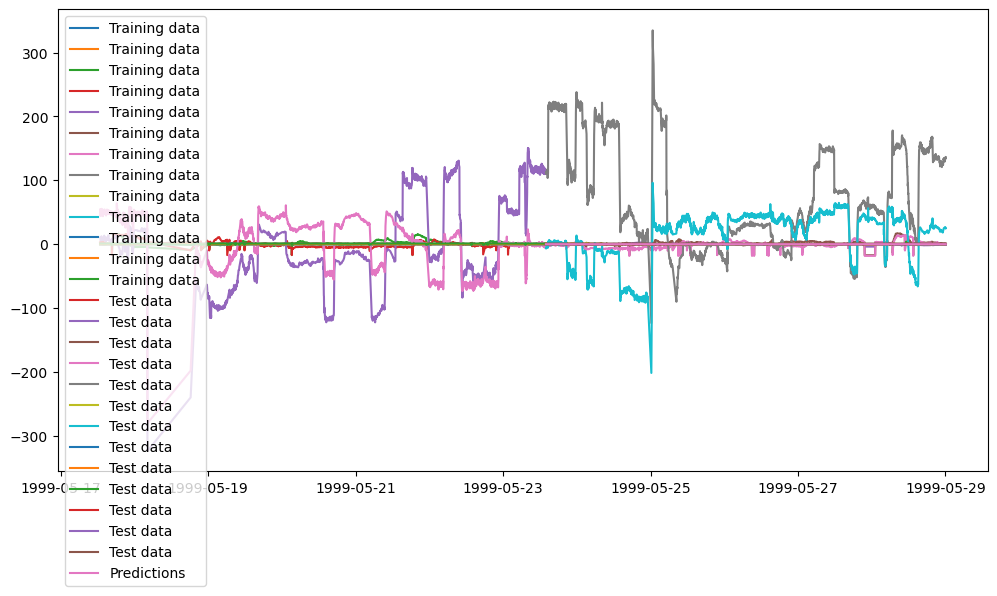

In [90]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the SARIMAX model
order = (1, 1, 1)
seasonal_order = (1, 0, 1, 12)
model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order )

# Fit the model to the training data
results = model.fit()

# Make predictions on the test data
start = len(train)
end = len(train) + len(test) - 1
predictions_sarima = results.predict(start=start, end=end, dynamic=False)

# Plot the predictions against the actual data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training data')
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()

**COMPARING PREDICTIONS BY MODELS SARIMAX,TRIPLE EXPONENTIAL SMOOTHING, naive model with the actual
values**

In [100]:
def Metrics_card(results, mae_test, method):
    new_results = pd.DataFrame({'Method': [method], 'MAE_test': [mae_test],})
    results = pd.concat([results, new_results], ignore_index=True)
    return results

In [108]:
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Method', 'MAE_test'])

# Add results for another model
results = Metrics_card(results, mae_naive_test, method='NAIVE Model')

print(results)

        Method  MAE_test
0  NAIVE Model  0.009239


C:\Users\Sahil\AppData\Local\Temp\ipykernel_15692\899282329.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_results], ignore_index=True)


In [109]:
# Add results for another model
results = Metrics_card(results, mae_tripleexp_test, method='triple exponential smoothing')

print(results)

                         Method  MAE_test
0                   NAIVE Model  0.009239
1  triple exponential smoothing  0.011920


In [110]:
# Add results for another model
results = Metrics_card(results, mae_sarimax_test, method='SARIMAX')

print(results)

                         Method  MAE_test
0                   NAIVE Model  0.009239
1  triple exponential smoothing  0.011920
2                       SARIMAX  0.012608


In [115]:
# Add results for another model
results = Metrics_card(results, mae_ma_test, method='MOVING AVERAGE')

print(results)

                         Method  MAE_test
0                   NAIVE Model  0.009239
1  triple exponential smoothing  0.011920
2                       SARIMAX  0.012608
3                MOVING AVERAGE  0.009239


**NAIVE MODEL and moving average SEEMS TO BE WORKING THE BEST , FOLLOWED BY TRIPLE EXPONENTIAL SMOOTHING**

**WE can use any of these models to train on unseen new data**